In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [60]:
df = pd.read_csv('Titanic-Dataset-Test.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,709,710,1,3,1,0.000000,1,1,-0.341452,True,False,False
1,439,440,0,2,1,0.100109,0,0,-0.437007,False,False,True
2,840,841,0,3,1,-0.746389,0,0,-0.488854,False,False,True
3,720,721,1,2,0,-1.823750,0,1,0.016023,False,False,True
4,39,40,1,3,0,-1.208115,1,0,-0.422074,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
174,433,434,0,3,1,-0.977252,0,0,-0.504962,False,False,True
175,773,774,0,3,1,0.000000,0,0,-0.502949,True,False,False
176,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
177,84,85,1,2,0,-0.977252,0,0,-0.437007,False,False,True


In [61]:
df['Survived'].value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

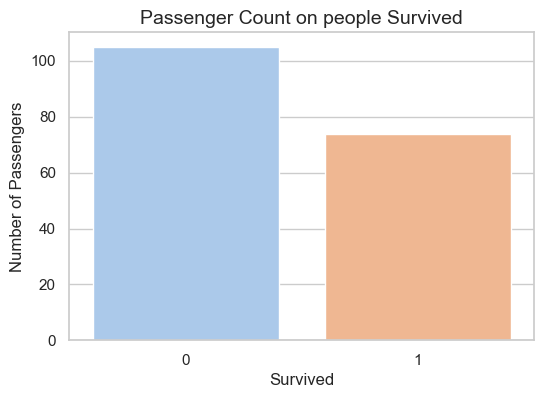

In [62]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=df, palette='pastel', legend=False)

plt.title('Passenger Count on people Survived', fontsize=14)
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()


In [63]:
# Separate majority and minority classes
df_majority = df[df['Survived'] == 0]
df_majority

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,439,440,0,2,1,0.100109,0,0,-0.437007,False,False,True
2,840,841,0,3,1,-0.746389,0,0,-0.488854,False,False,True
7,333,334,0,3,1,-1.054207,2,0,-0.285997,False,False,True
10,137,138,0,1,1,0.561835,1,0,0.420730,False,False,True
11,696,697,0,3,1,1.100515,0,0,-0.486337,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
168,521,522,0,3,1,-0.592481,0,0,-0.489442,False,False,True
169,363,364,0,3,1,0.407926,0,0,-0.506472,False,False,True
173,852,853,0,3,0,-1.592887,1,1,-0.341452,True,False,False
174,433,434,0,3,1,-0.977252,0,0,-0.504962,False,False,True


In [64]:
df_minority = df[df['Survived'] == 1]
df_minority

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,709,710,1,3,1,0.000000,1,1,-0.341452,True,False,False
3,720,721,1,2,0,-1.823750,0,1,0.016023,False,False,True
4,39,40,1,3,0,-1.208115,1,0,-0.422074,True,False,False
5,290,291,1,1,0,-0.284663,0,0,0.939198,False,False,True
6,300,301,1,3,0,0.000000,0,0,-0.492378,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
171,417,418,1,2,0,-0.900298,0,2,-0.386671,False,False,True
172,572,573,1,1,1,0.484880,0,0,-0.117118,False,False,True
176,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
177,84,85,1,2,0,-0.977252,0,0,-0.437007,False,False,True


In [65]:
df_minority_upsampled = resample(
    df_minority,
    replace=True,                # sample with replacement
    n_samples=len(df_majority),  # match number of majority class
    random_state=42              # for reproducibility
)
df_minority_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
125,604,605,1,1,1,0.407926,0,0,-0.113846,True,False,False
34,204,205,1,3,1,-0.900298,0,0,-0.486337,False,False,True
176,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
148,31,32,1,1,0,0.000000,1,0,2.301729,True,False,False
53,802,803,1,1,1,-1.438978,1,2,1.767741,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
153,109,110,1,3,0,0.000000,1,0,-0.162169,False,True,False
90,165,166,1,3,1,-1.592887,0,2,-0.235157,False,False,True
109,209,210,1,1,1,0.792698,0,0,-0.024246,True,False,False
86,215,216,1,1,0,0.100109,1,0,1.632335,True,False,False


In [66]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,439,440,0,2,1,0.100109,0,0,-0.437007,False,False,True
2,840,841,0,3,1,-0.746389,0,0,-0.488854,False,False,True
7,333,334,0,3,1,-1.054207,2,0,-0.285997,False,False,True
10,137,138,0,1,1,0.561835,1,0,0.420730,False,False,True
11,696,697,0,3,1,1.100515,0,0,-0.486337,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
153,109,110,1,3,0,0.000000,1,0,-0.162169,False,True,False
90,165,166,1,3,1,-1.592887,0,2,-0.235157,False,False,True
109,209,210,1,1,1,0.792698,0,0,-0.024246,True,False,False
86,215,216,1,1,0,0.100109,1,0,1.632335,True,False,False


In [67]:
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_upsampled

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,210,211,0,3,1,-0.438572,0,0,-0.506472,False,False,True
1,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
2,594,595,0,2,1,0.561835,1,0,-0.124920,False,False,True
3,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
4,545,546,0,1,1,2.639602,0,0,-0.124920,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
205,204,205,1,3,1,-0.900298,0,0,-0.486337,False,False,True
206,30,31,0,1,1,0.792698,0,0,-0.090272,True,False,False
207,77,78,0,3,1,0.000000,0,0,-0.486337,False,False,True
208,291,292,1,1,0,-0.823344,1,0,1.185430,True,False,False


In [68]:
df_upsampled['Survived'].value_counts()

Survived
0    105
1    105
Name: count, dtype: int64

In [69]:
df = pd.read_csv('Titanic-Dataset-Test.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,709,710,1,3,1,0.000000,1,1,-0.341452,True,False,False
1,439,440,0,2,1,0.100109,0,0,-0.437007,False,False,True
2,840,841,0,3,1,-0.746389,0,0,-0.488854,False,False,True
3,720,721,1,2,0,-1.823750,0,1,0.016023,False,False,True
4,39,40,1,3,0,-1.208115,1,0,-0.422074,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
174,433,434,0,3,1,-0.977252,0,0,-0.504962,False,False,True
175,773,774,0,3,1,0.000000,0,0,-0.502949,True,False,False
176,25,26,1,3,0,0.638789,1,5,-0.016444,False,False,True
177,84,85,1,2,0,-0.977252,0,0,-0.437007,False,False,True


In [70]:
df['Survived'].value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

In [71]:
df_majority = df[df['Survived'] == 0]
df_minority = df[df['Survived'] == 1]

In [72]:
df_majority_downsampled = resample(
    df_majority,
    replace=False,                # sample without replacement
    n_samples=len(df_minority),   # match number of minority class
    random_state=42               # for reproducibility
)

In [73]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [74]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [75]:
df_downsampled['Survived'].value_counts()

Survived
1    74
0    74
Name: count, dtype: int64

In [78]:
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)  # Features
y = df['Survived']                                   # Target

KeyError: "['Name', 'Ticket'] not found in axis"